In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


# Imports nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Charger les données nettoyées
df = pd.read_csv('../data/processed/cleaned_data.csv')


# Afficher les 15 meilleurs joueurs en Ligue 2 et moins en xG overperf

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\2422754839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']


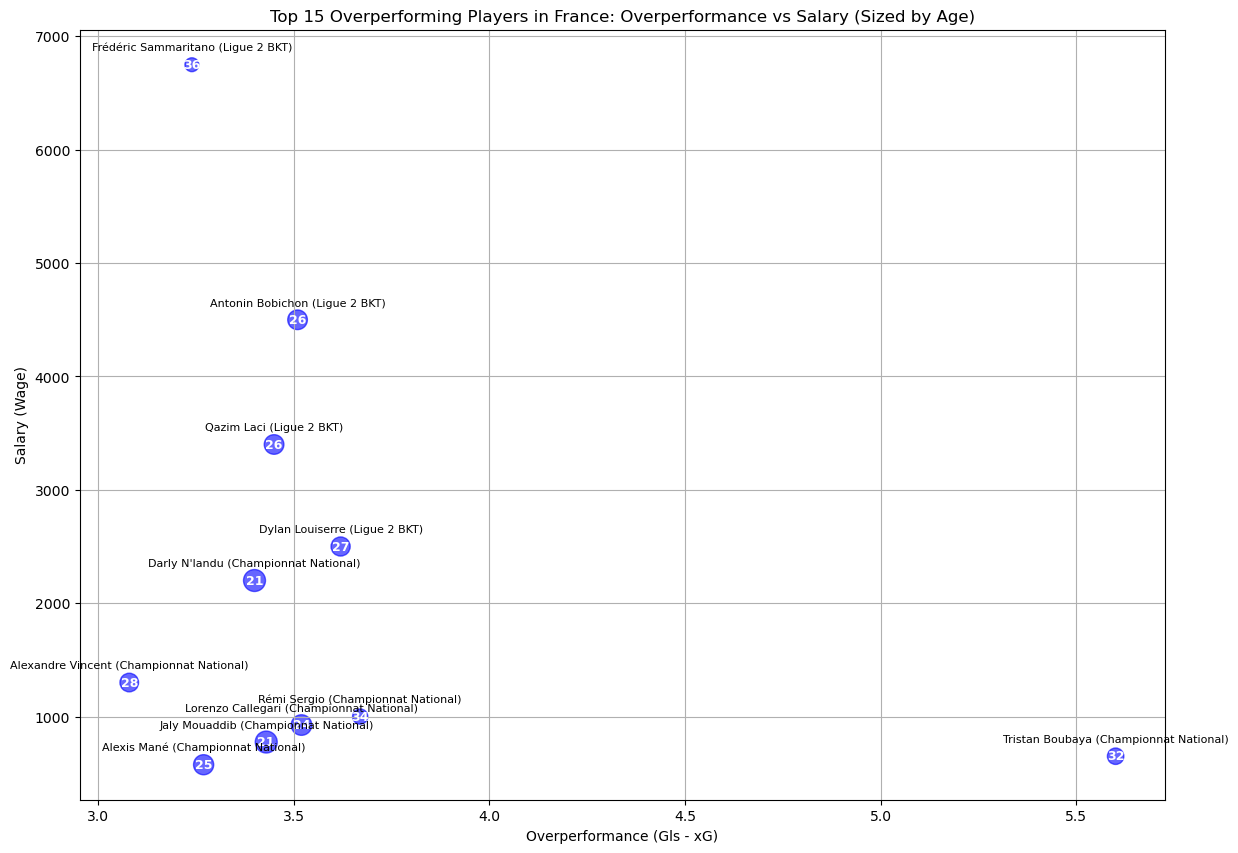

In [3]:

# Filtrer les joueurs qui évoluent en France
french_leagues = ["Ligue 2 BKT", "Championnat National", "Ligues régionales"]
df_france = df[df['Division'].isin(french_leagues)]

# Calculer l'overperformance des buteurs
df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']

# Sélectionner les 15 premières overperformances
top_overperformers_france = df_france.nlargest(15, 'Overperformance_Gls_xG')

# Retirer les salaires supérieurs à 50000
top_overperformers_france = top_overperformers_france[top_overperformers_france['Wage'] <= 50000]

# Créer le scatter plot avec overperformance en X et salaire en Y
plt.figure(figsize=(14, 10))

# Calculer la taille des points en fonction de l'âge (plus jeune = plus gros)
age_factor = (top_overperformers_france['Age'].max() - top_overperformers_france['Age']) + 10
plt.scatter(top_overperformers_france['Overperformance_Gls_xG'], top_overperformers_france['Wage'], 
            s=age_factor * 10, color='blue', alpha=0.6)

# Ajouter les noms des joueurs, leur championnat et leur âge dans les points
for i in range(len(top_overperformers_france)):
    player_name = top_overperformers_france.iloc[i]['Name']
    league_name = top_overperformers_france.iloc[i]['Division']
    age = top_overperformers_france.iloc[i]['Age']
    x = top_overperformers_france.iloc[i]['Overperformance_Gls_xG']
    y = top_overperformers_france.iloc[i]['Wage']
    
    # Annoter l'âge au centre du cercle
    plt.annotate(f"{age}", (x, y), 
                 textcoords="offset points", xytext=(0, 0), ha='center', va='center', 
                 fontsize=9, color='white', weight='bold')

    # Annoter le nom et le championnat légèrement au-dessus du cercle
    plt.annotate(f"{player_name} ({league_name})", (x, y),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.xlabel('Overperformance (Gls - xG)')
plt.ylabel('Salary (Wage)')
plt.title('Top 15 Overperforming Players in France: Overperformance vs Salary (Sized by Age)')
plt.grid(True)
plt.show()


# Exploration des Données

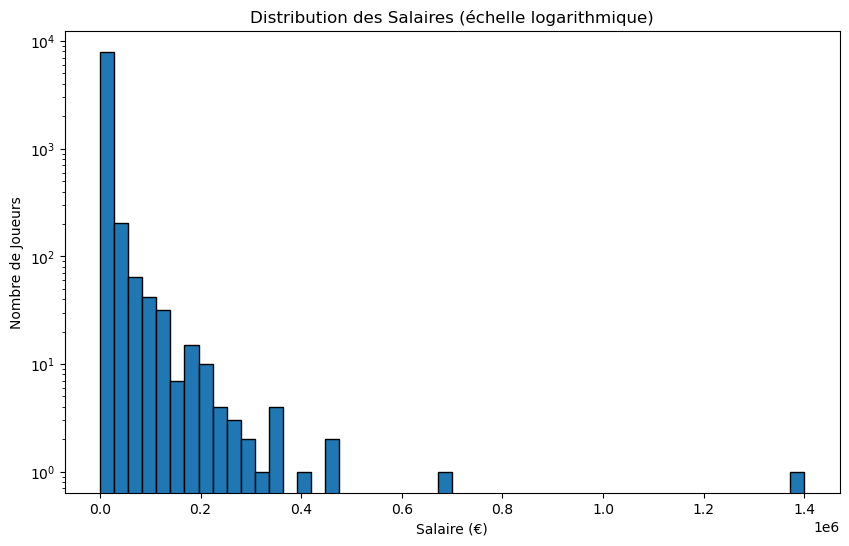

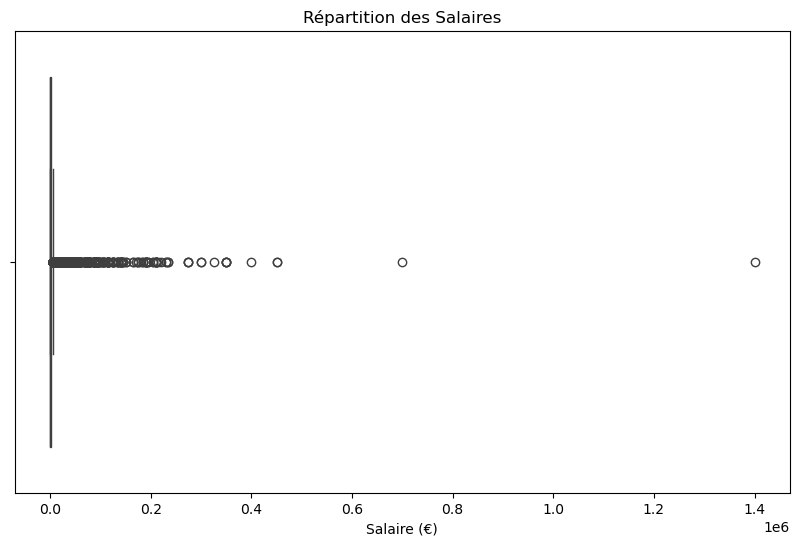

In [4]:
# Histogramme avec échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(df['Wage'], bins=50, edgecolor='black', log=True)
plt.title('Distribution des Salaires (échelle logarithmique)')
plt.xlabel('Salaire (€)')
plt.ylabel('Nombre de Joueurs')
plt.show()

# Boxplot des salaires
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Wage'])
plt.title('Répartition des Salaires')
plt.xlabel('Salaire (€)')
plt.show()


# Analyse des corrélations entre les stats numériques

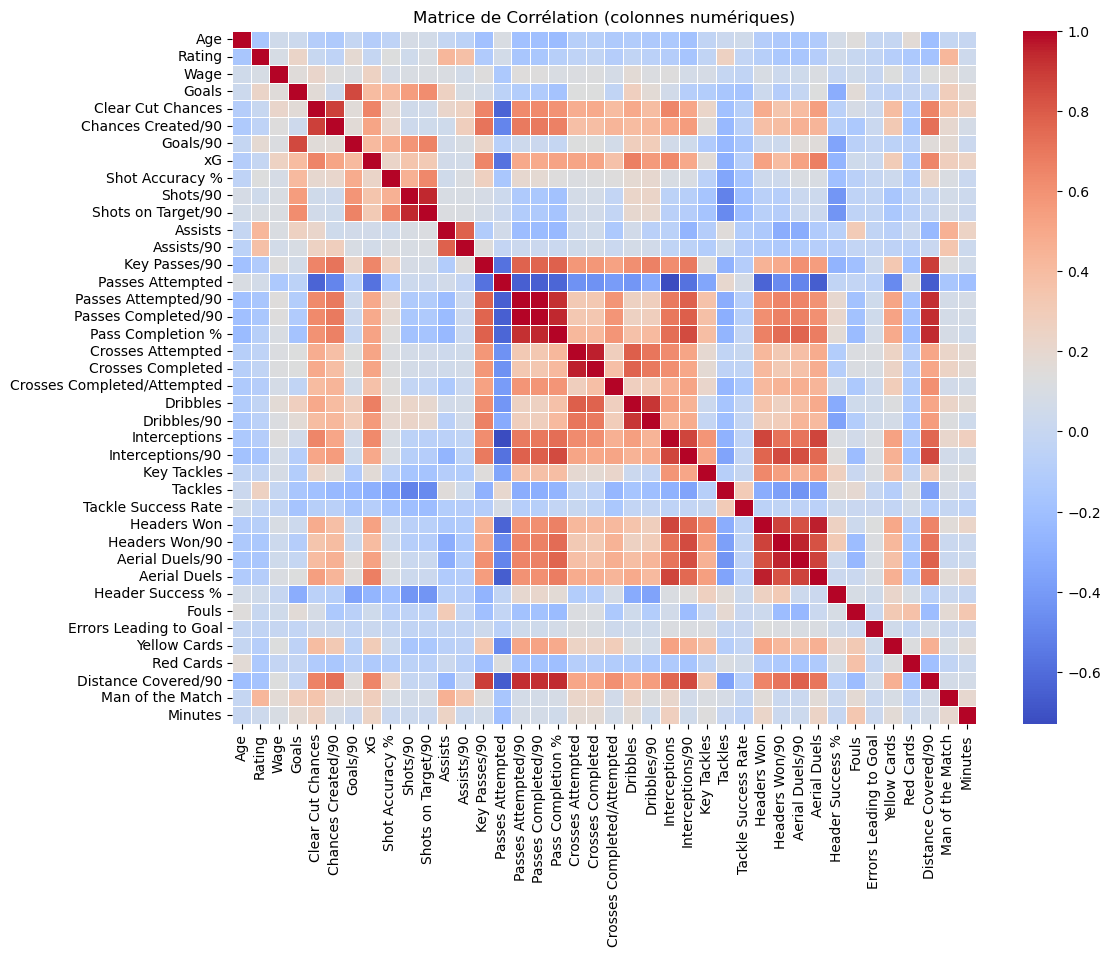

In [5]:

# Filtrer les colonnes numériques uniquement
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.drop('ID', axis=1)

# Matrice de corrélation pour les colonnes numériques
plt.figure(figsize=(12, 9))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.7)
plt.title('Matrice de Corrélation (colonnes numériques)')
plt.show()


# Analyse des positions uniques

In [6]:
def categorize_midfielders(position):
    position = position.upper()
    
    if 'DM' in position:
        return 'Milieu Défensif'
    elif 'AM (C)' in position:
        return 'Milieu Offensif Central'
    elif 'M (C)' in position:
        return 'Milieu Central'
    else:
        return 'Autre'
# Appliquer la fonction de regroupement
df['Position_Categorized'] = df['Position'].apply(categorize_midfielders)

# Vérifiez la distribution après regroupement
position_categorized_counts = df['Position_Categorized'].value_counts()
print(position_categorized_counts)


Position_Categorized
Milieu Défensif            3532
Milieu Central             3129
Milieu Offensif Central    2384
Autre                       852
Name: count, dtype: int64


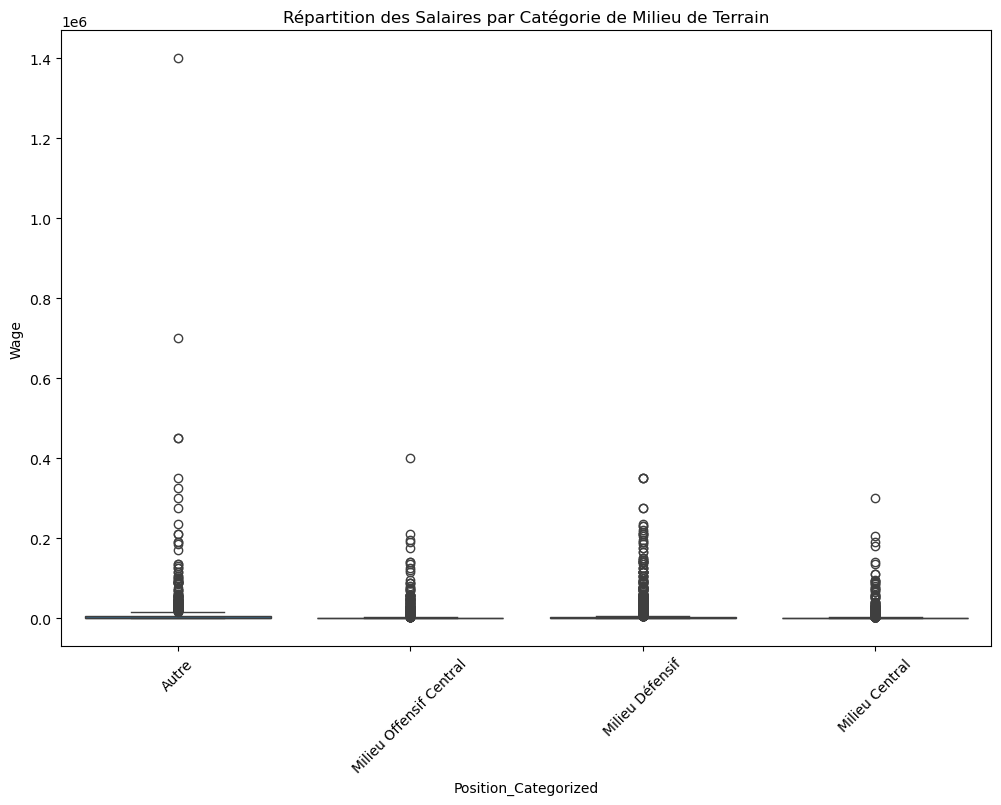

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position_Categorized', y='Wage', data=df)
plt.xticks(rotation=45)
plt.title('Répartition des Salaires par Catégorie de Milieu de Terrain')
plt.show()

# Identification des Joueurs Performants

                      Name                       Division  Goals  \
2696    Jort van der Sande        Keuken Kampioen Divisie     22   
2546            Jaze Kabia               cinch League One     20   
2971         Aaron Collins             Sky Bet League Two     20   
7332       Willie Faulkner     Bluefin Sport Championship     13   
1347         Denys Harmash                    FavBet Liha     12   
1032   Baptiste Santamaria              Ligue 1 Uber Eats     13   
1316   Maxim Plakushchenko  Ligat Tel Aviv Stock Exchange     12   
1296  Jakub Błaszczykowski                PKO Ekstraklasa     12   
1432         Alassane Ndao            Spor Toto Süper Lig     17   
6461        Daniel Sebesta                        2. Liga     16   
754          Yanis Rahmani               LaLiga SmartBank     14   
1027              Pep Biel                   3F Superliga     17   
6019         Tony Dingwall               cinch League Two     12   
1492         Bohdan Lednev                  OTP 

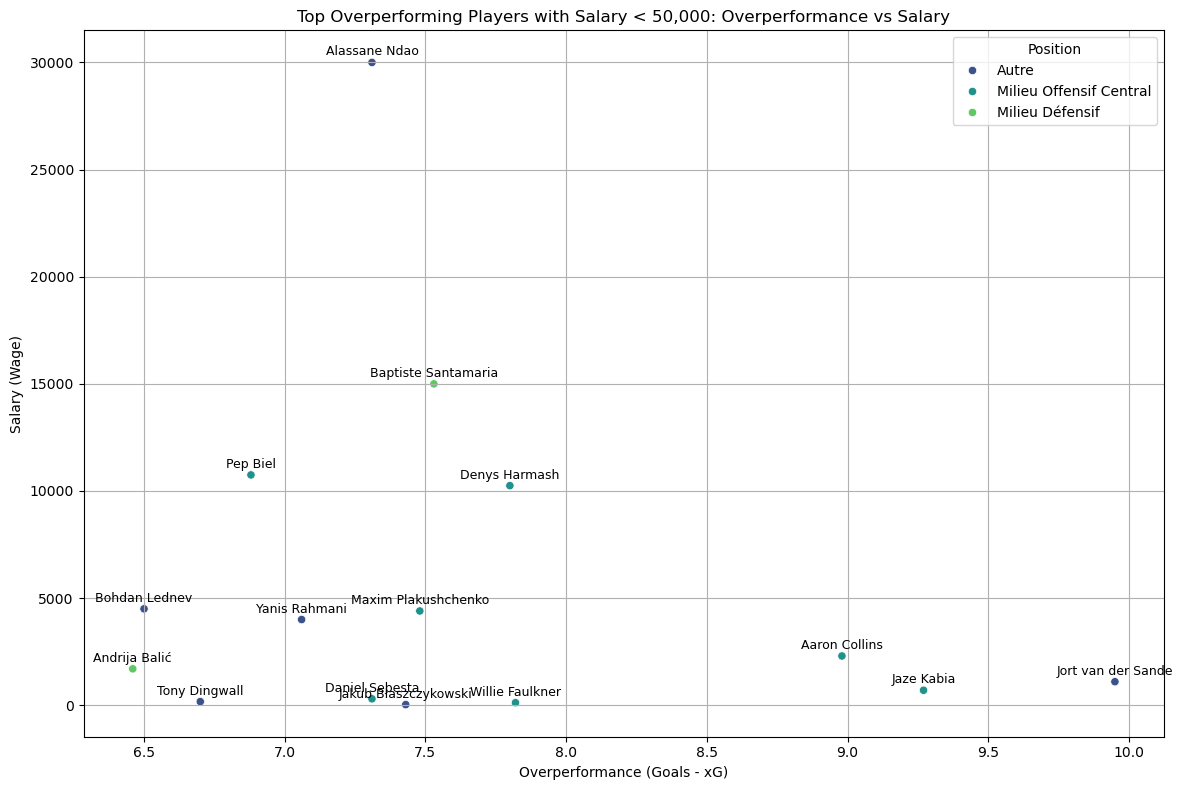

In [8]:
# Calculer la différence entre les buts marqués et les xG
df_filtered_xG = df.copy()  # Utiliser copy() pour éviter les modifications sur l'original

df_filtered_xG['Difference_Gls_xG'] = df_filtered_xG['Goals'] - df_filtered_xG['xG']

# Filtrer pour les joueurs où la différence est inférieure ou égale à 50% des buts marqués
df_filtered_xG_realistic = df_filtered_xG[df_filtered_xG['Difference_Gls_xG'] <= 0.7 * df_filtered_xG['Goals']]

# Filtrer les joueurs avec un salaire inférieur à 50 000
df_filtered_xG_realistic = df_filtered_xG_realistic[df_filtered_xG_realistic['Wage'] < 50000]

# Identifier les joueurs surperformants après ce filtrage
df_filtered_xG_realistic['Overperf_Gls_xG'] = df_filtered_xG_realistic['Goals'] - df_filtered_xG_realistic['xG']
top_overperformers_realistic = df_filtered_xG_realistic.nlargest(15, 'Overperf_Gls_xG')

# Afficher les résultats
print(top_overperformers_realistic[['Name', 'Division', 'Goals', 'Overperf_Gls_xG', 'Wage']])

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', hue='Position_Categorized', data=top_overperformers_realistic, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers_realistic)):
    player_name = top_overperformers_realistic.iloc[i]['Name']
    overperformance = top_overperformers_realistic.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming Players with Salary < 50,000: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.show()


# Analyse des français qui Overperf leurs xG

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\4131826170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_xG_realistic_fra['Overperf_Gls_xG'] = df_filtered_xG_realistic_fra['Goals'] - df_filtered_xG_realistic_fra['xG']


                      Name                       Club  \
1032   Baptiste Santamaria                     Rennes   
754          Yanis Rahmani                      Eibar   
4193       Tristan Boubaya                 Concarneau   
1509          Mahdi Camara              Saint-Étienne   
1755       Dylan Louiserre                      Niort   
1545      Antonin Bobichon                      Nancy   
3820         Darly N'landu               US Avranches   
4624           Alexis Mané                    Sète 34   
5576          Hugo Fargues                    Yverdon   
1617  Frédéric Sammaritano                      Dijon   
5195     Francis Dady Ngoy  Thonon Evian Grand Geneve   
5108      Alexandre Fillon                  FC Annecy   
3965        Timothée Dieng                Exeter City   
7469           Steve Tanga                   Postojna   
1894         Romain Grange                Châteauroux   

                                      Division  Goals  Overperf_Gls_xG  \
1032         

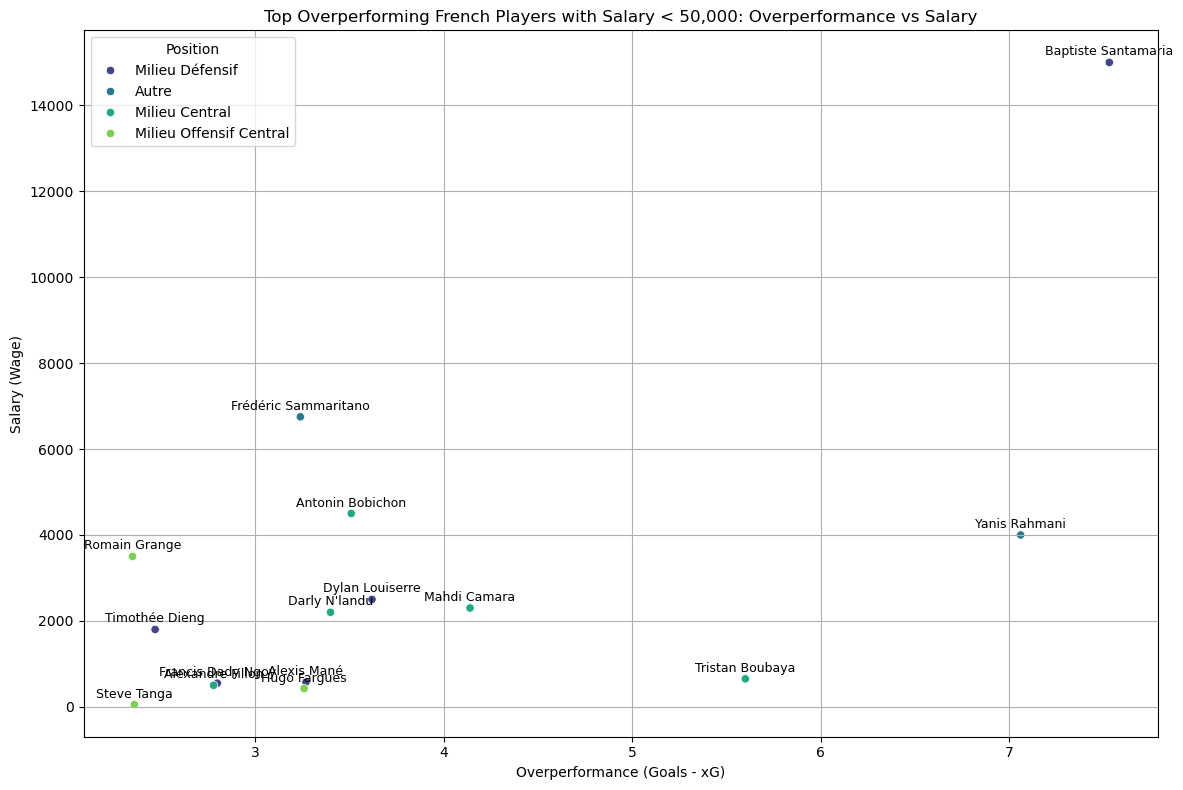

In [9]:
# Filtrer par nationalité française
df_filtered_xG_realistic_fra = df_filtered_xG_realistic[df_filtered_xG_realistic['Nationality'] == 'FRA']

# Identifier les joueurs surperformants après ce filtrage
df_filtered_xG_realistic_fra['Overperf_Gls_xG'] = df_filtered_xG_realistic_fra['Goals'] - df_filtered_xG_realistic_fra['xG']
top_overperformers_realistic_fra = df_filtered_xG_realistic_fra.nlargest(15, 'Overperf_Gls_xG')

# Afficher les résultats
print(top_overperformers_realistic_fra[['Name', 'Club', 'Division', 'Goals', 'Overperf_Gls_xG', 'Wage']])

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', hue='Position_Categorized', data=top_overperformers_realistic_fra, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers_realistic_fra)):
    player_name = top_overperformers_realistic_fra.iloc[i]['Name']
    overperformance = top_overperformers_realistic_fra.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic_fra.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming French Players with Salary < 50,000: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.show()




# Evaluating u23 xG overperformances in the top 5 leagues 

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\3729373428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_leagues['Overperformance_Gls_xG'] = df_top_leagues['Goals'] - df_top_leagues['xG']
C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\3729373428.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')


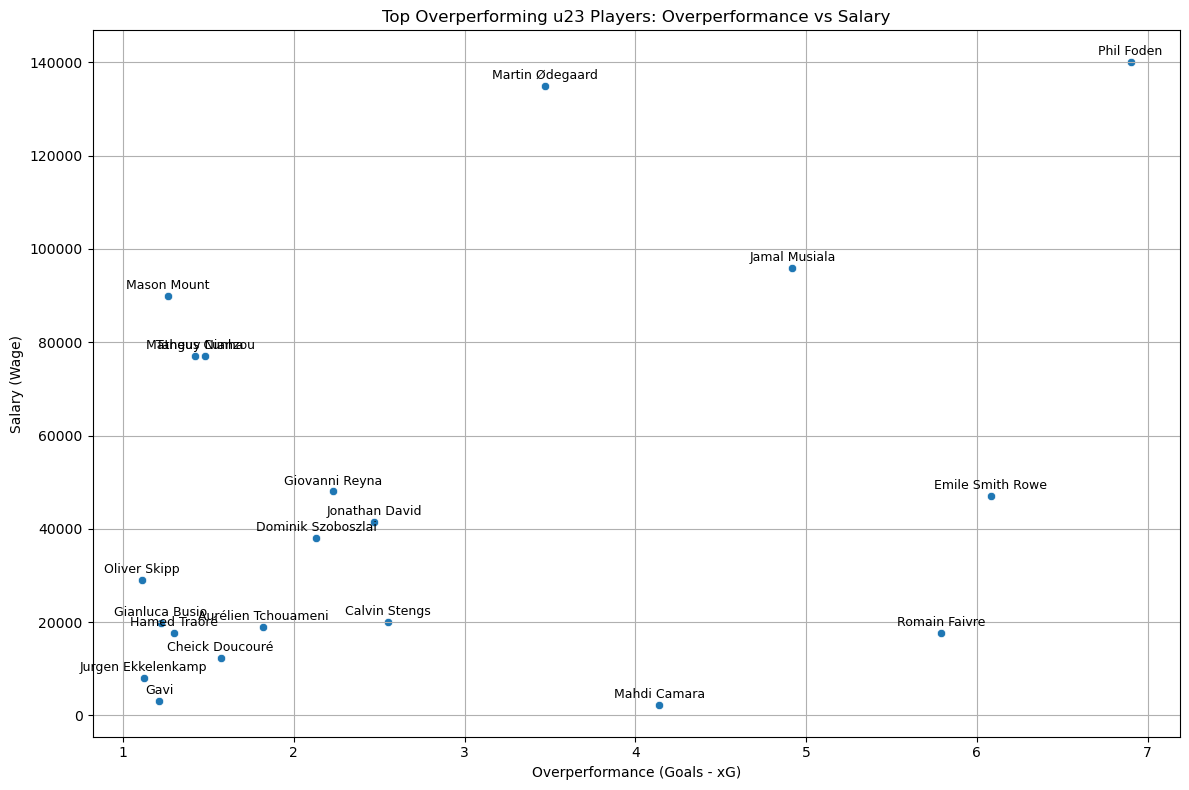

In [10]:
# Filtrer les joueurs 
top_leagues = ["Ligue 1 Uber Eats", "Premier League", "Bundesliga", "Serie A TIM", "LaLiga Santander"]
df_top_leagues = df[df['Division'].isin(top_leagues)]

# Calculer l'overperformance des buteurs
df_top_leagues['Overperformance_Gls_xG'] = df_top_leagues['Goals'] - df_top_leagues['xG']

# Filtrer par âge < 23 
top_overperformers = df_top_leagues[df_top_leagues['Age'] <= 23]

# Sélectionner les 30 premières overperformances
top_overperformers = top_overperformers.nlargest(20, 'Overperformance_Gls_xG') 


# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers)):
    player_name = top_overperformers.iloc[i]['Name']
    overperformance = top_overperformers.iloc[i]['Overperformance_Gls_xG']
    wage = top_overperformers.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming u23 Players: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluating u20 overperformances in the top 5 leagues

Age
25    53
27    43
24    43
23    40
28    39
26    38
22    31
32    29
31    29
30    29
29    26
21    16
34    14
33    12
19    10
35    10
20     6
36     5
37     2
38     2
18     1
39     1
17     1
Name: count, dtype: int64


C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\5401607.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers_20, palette='viridis')


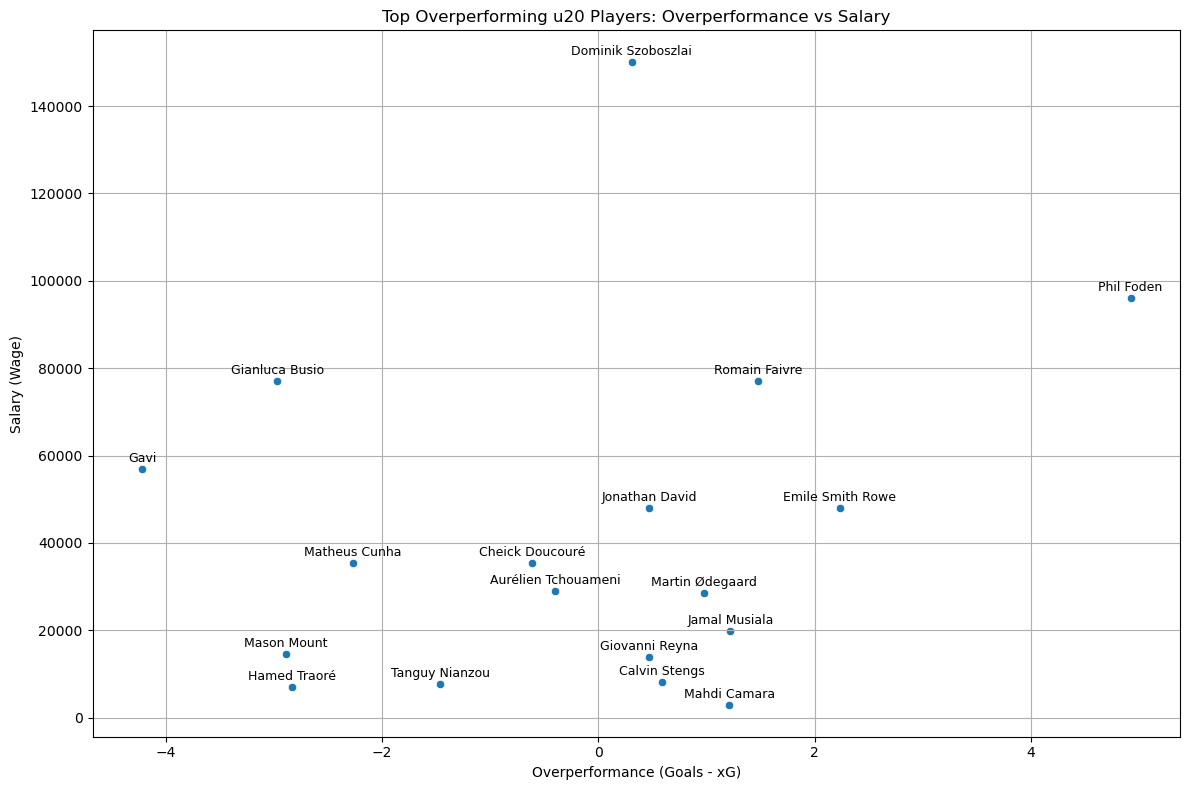

In [11]:

# Filtrer par âge < 20
top_overperformers_20 = df_top_leagues[df_top_leagues['Age'] <= 20]
count = df_top_leagues['Age'].value_counts()
print(count)

# Sélectionner les 30 premières overperformances
top_overperformers_20 = top_overperformers_20.nlargest(30, 'Overperformance_Gls_xG') 


# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers_20, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers_20)):
    player_name = top_overperformers.iloc[i]['Name']
    overperformance = top_overperformers_20.iloc[i]['Overperformance_Gls_xG']
    wage = top_overperformers_20.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming u20 Players: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluating u19 overperf in the top 5 leagues

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\3717153962.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')


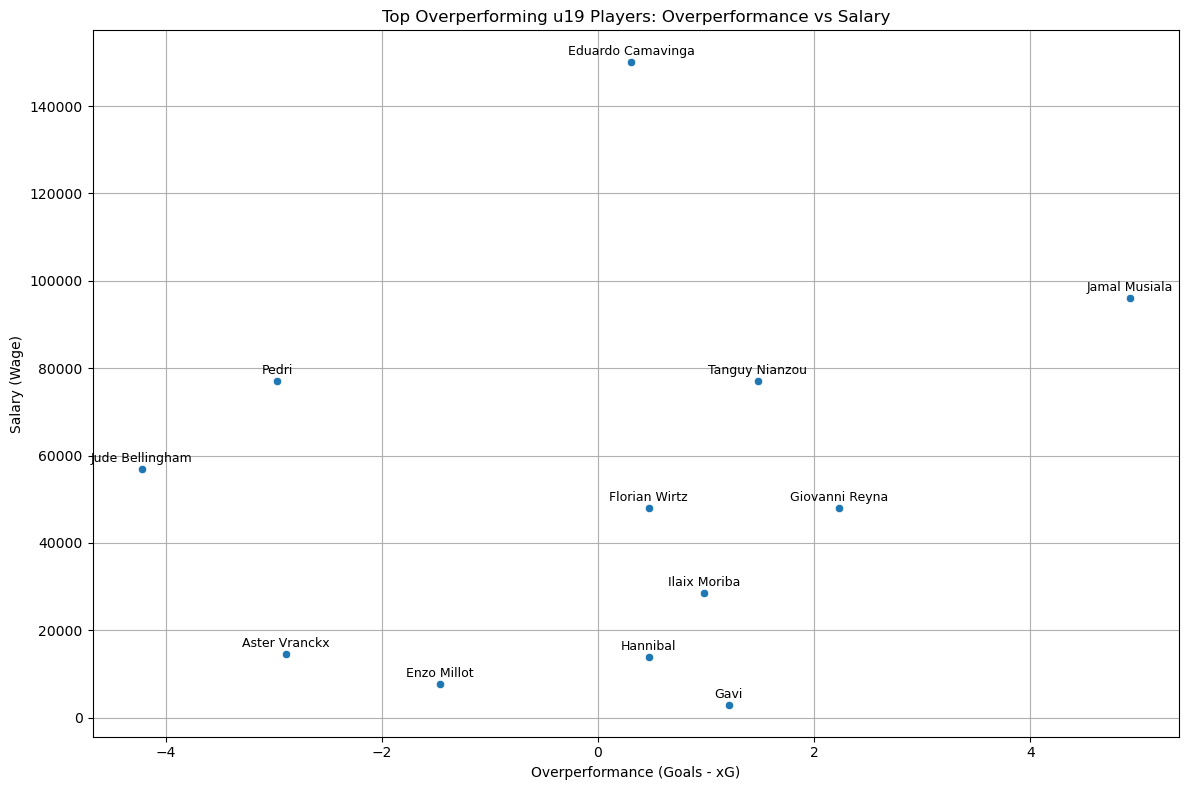

In [12]:
# Filtrer par âge < 20 
top_overperformers = df_top_leagues[df_top_leagues['Age'] <= 19]

# Sélectionner les 30 premières overperformances
top_overperformers = top_overperformers.nlargest(20, 'Overperformance_Gls_xG') 


# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers)):
    player_name = top_overperformers.iloc[i]['Name']
    overperformance = top_overperformers.iloc[i]['Overperformance_Gls_xG']
    wage = top_overperformers.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming u19 Players: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluate top xG overperformers in tier 2 leagues

In [13]:
# Exclude top 5 leagues from the dataset
df_other_leagues = df[~df['Division'].isin(top_leagues)]
# Exclude null wage values
df_other_leagues = df_other_leagues[df_other_leagues['Wage'] > 0]
# Exclude 0 division values
df_other_leagues = df_other_leagues[df_other_leagues['Division'] != 0]
# List tier 2 leagues
tier_2_leagues = ["EFL Championship", "Liga Portugal SABSEG", "Eredivisie", "Ligue 1 Uber Eats", "2. Bundesliga"]

# Classify division by their median wage

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\2715374408.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=u21_players, palette='viridis')


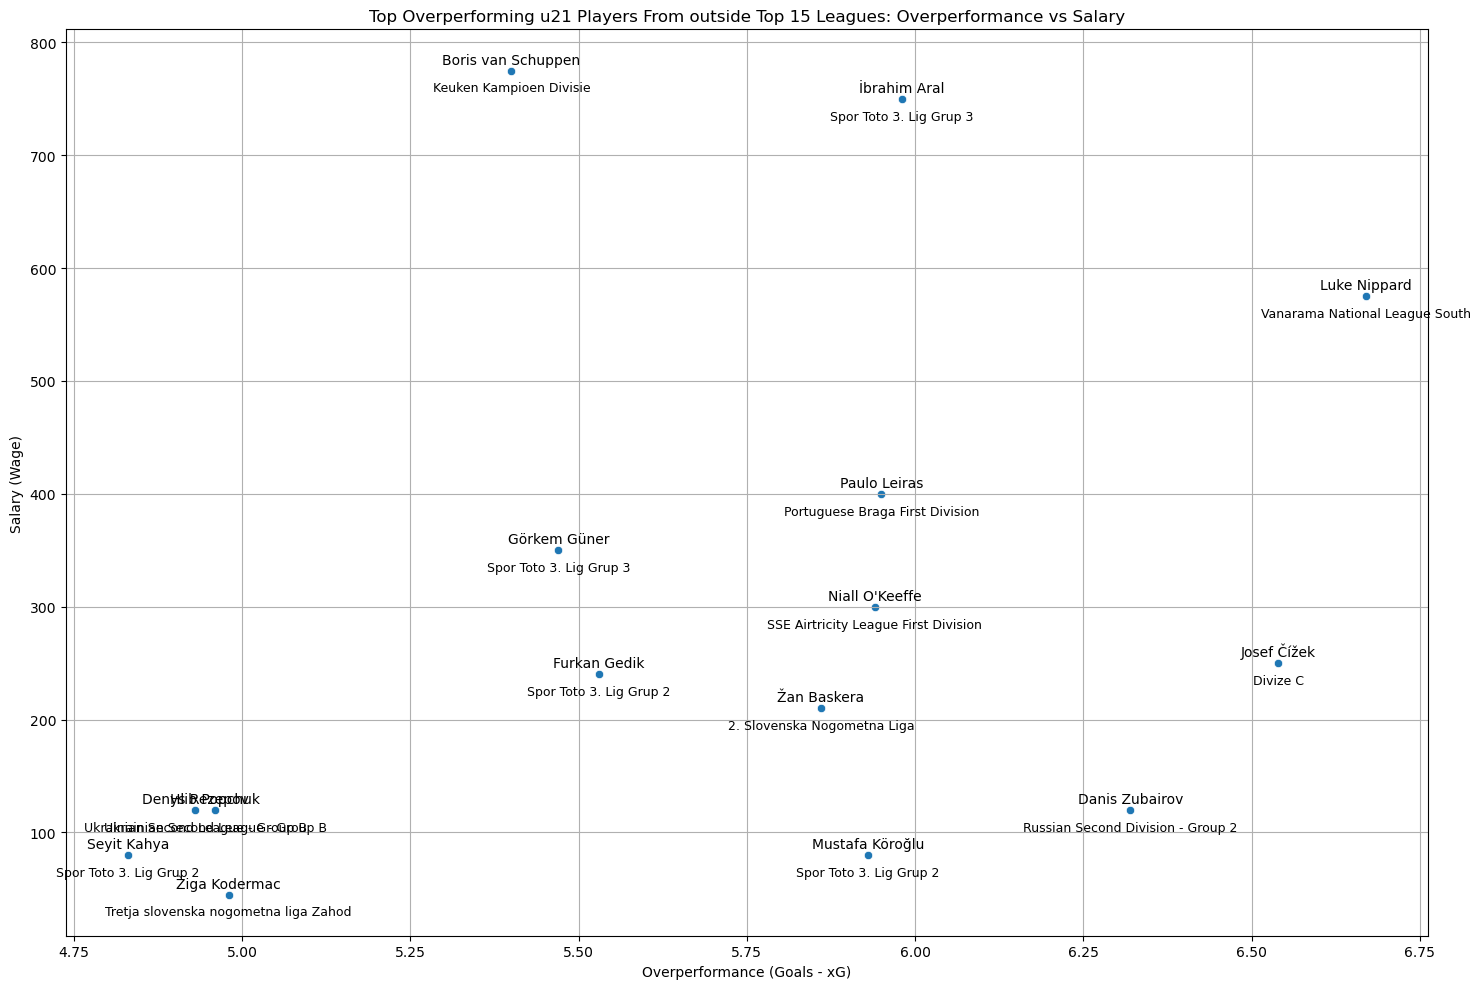

Division
2. Slovenska Nogometna Liga              5.860
Divize C                                 6.540
Keuken Kampioen Divisie                  5.400
Portuguese Braga First Division          5.950
Russian Second Division - Group 2        6.320
SSE Airtricity League First Division     5.940
Spor Toto 3. Lig Grup 2                  5.530
Spor Toto 3. Lig Grup 3                  5.725
Tretja slovenska nogometna liga Zahod    4.980
Ukrainian Second League - Group B        4.945
Vanarama National League South           6.670
Name: Overperformance_Gls_xG, dtype: float64


In [14]:
# Calculate median wage by Division
median_wage_by_division = df.groupby('Division')['Wage'].median()

# Filter divisions with more than 10 players
divisions_with_more_than_10_players = df['Division'].value_counts()
divisions_with_more_than_10_players = divisions_with_more_than_10_players[divisions_with_more_than_10_players >= 10].index
median_wage_by_division = median_wage_by_division[median_wage_by_division.index.isin(divisions_with_more_than_10_players)]

# Delete NaN values
median_wage_by_division = median_wage_by_division.dropna()

top_8_championships = median_wage_by_division.sort_values(ascending=False).head(8)
top_8_championships_list = top_8_championships.index.tolist()
players_outside_top_8 = df[~df['Division'].isin(top_8_championships_list)]

u21_players = players_outside_top_8[players_outside_top_8['Age'] <= 21]
# Exclude players with 0 xG
u21_players = u21_players[u21_players['xG'] > 0]
# Exclude players that can play as a striker
u21_players = u21_players[~u21_players['Position'].str.contains('ST')]
# Exclude players with wage higher than 5000 
u21_players = u21_players[u21_players['Wage'] <= 5000]

u21_players = u21_players[['Name', 'Age', 'Club', 'Goals', 'xG', 'Wage', 'Nationality', 'Division', 'Rating']]
u21_players['Overperformance_Gls_xG'] = u21_players['Goals'] - u21_players['xG']

u21_players = u21_players.nlargest(15, 'Overperformance_Gls_xG') 


# Create graph
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=u21_players, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(u21_players)):
    player_name = u21_players.iloc[i]['Name']
    overperformance = u21_players.iloc[i]['Overperformance_Gls_xG']
    wage = u21_players.iloc[i]['Wage']
    league = u21_players.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )
    plt.annotate(
        league, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming u21 Players From outside Top 15 Leagues: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate median Overperformance_Gls_xG by Division for u21 players from outside top 15 leagues
median_overperformance_by_division = u21_players.groupby('Division')['Overperformance_Gls_xG'].median()
print(median_overperformance_by_division)

# Comparing Top Performing U21 Midfielders: Top 8 Leagues vs. Outside Top 8 Leagues (Under 10k wage)

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\1029692103.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance', y='Wage', data=top_performers_top_8, palette='viridis')


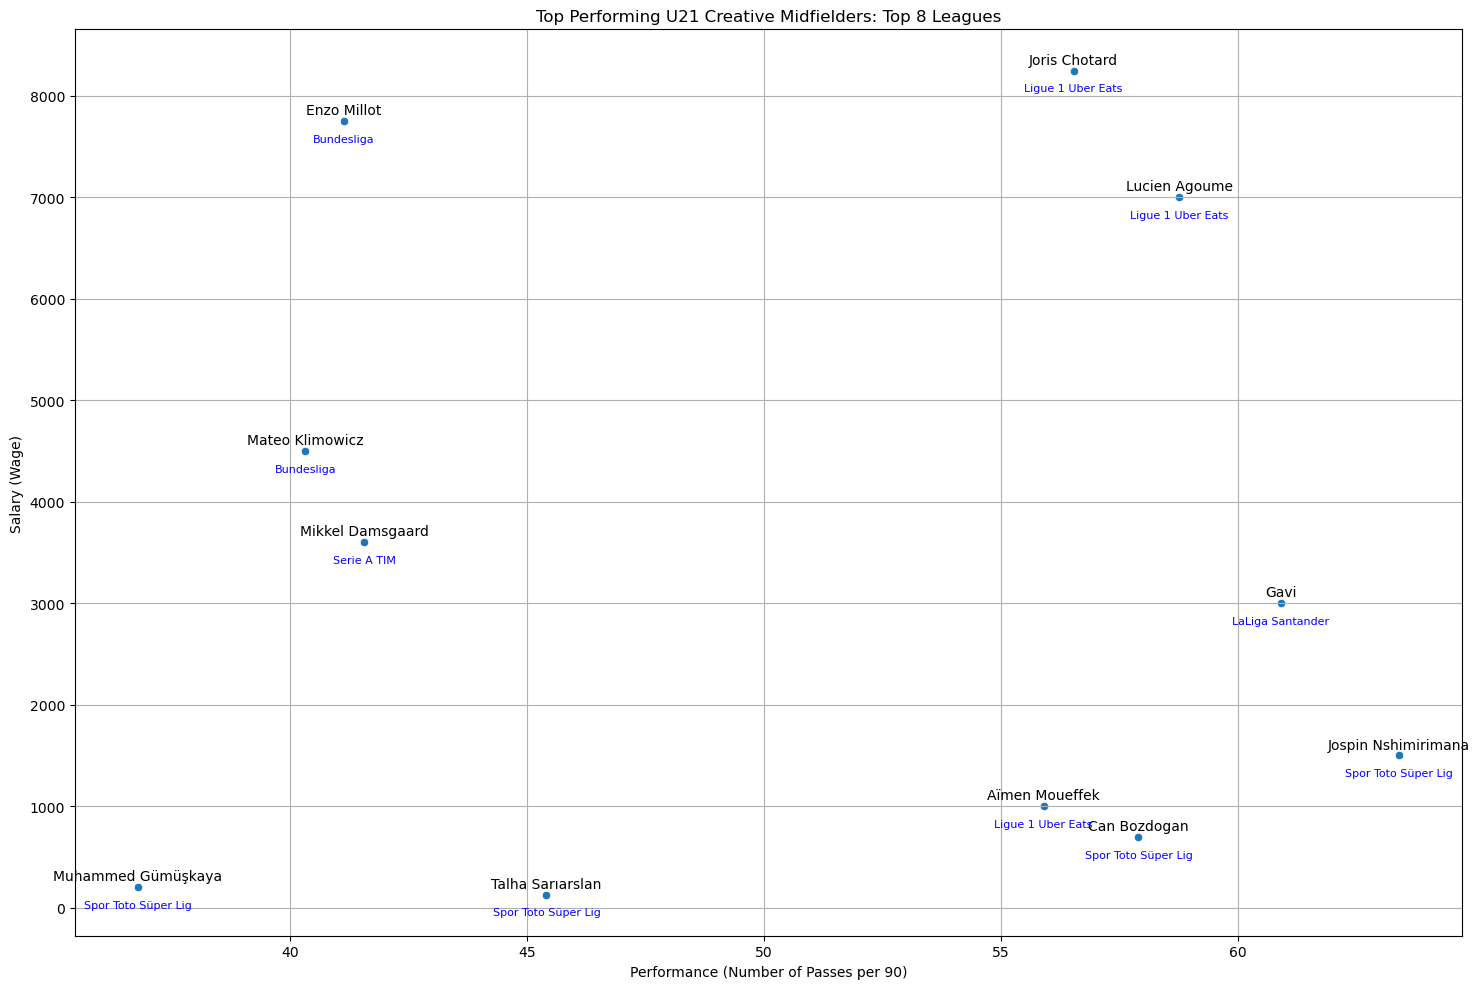

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_18068\1029692103.py:80: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance', y='Wage', data=top_performers_outside_top_8, palette='viridis')


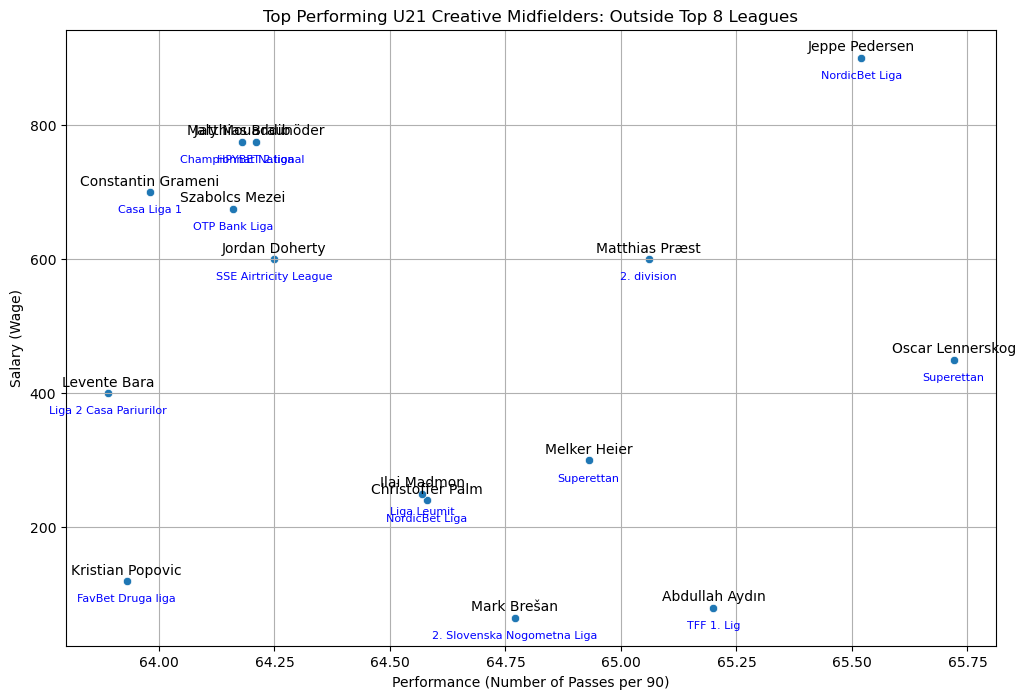

In [15]:
# Calculate median wage by Division
median_wage_by_division = df.groupby('Division')['Wage'].median()

# Filter divisions with more than 10 players
divisions_with_more_than_10_players = df['Division'].value_counts()
divisions_with_more_than_10_players = divisions_with_more_than_10_players[divisions_with_more_than_10_players >= 10].index
median_wage_by_division = median_wage_by_division[median_wage_by_division.index.isin(divisions_with_more_than_10_players)]

# Remove NaN values
median_wage_by_division = median_wage_by_division.dropna()

# Select the top 8 leagues based on median wage
top_8_leagues = median_wage_by_division.sort_values(ascending=False).head(8).index.tolist()

# Filter players from top 8 leagues
players_top_8 = df[df['Division'].isin(top_8_leagues)]

# Filter players from leagues outside top 8
players_outside_top_8 = df[~df['Division'].isin(top_8_leagues)]

# Filter U21 players in both groups
u21_players_top_8 = players_top_8[(players_top_8['Age'] <= 21) & (players_top_8['Position'].str.contains('M'))]
u21_players_outside_top_8 = players_outside_top_8[(players_outside_top_8['Age'] <= 21) & (players_outside_top_8['Position'].str.contains('M'))]

# Further filter to include only players with significant pass counts and wage less than 10000
u21_players_top_8 = u21_players_top_8[u21_players_top_8['Passes Completed/90'] > 30]
u21_players_outside_top_8 = u21_players_outside_top_8[u21_players_outside_top_8['Passes Completed/90'] > 30]
u21_players_top_8 = u21_players_top_8[u21_players_top_8['Wage'] < 10000]
u21_players_outside_top_8 = u21_players_outside_top_8[u21_players_outside_top_8['Wage'] < 10000]

# Calculate performance metric for midfielders (number of passes)
u21_players_top_8['Performance'] = u21_players_top_8['Passes Completed/90']
u21_players_outside_top_8['Performance'] = u21_players_outside_top_8['Passes Completed/90']


# Select top 15 players based on performance
top_performers_top_8 = u21_players_top_8.nlargest(15, 'Performance')
top_performers_outside_top_8 = u21_players_outside_top_8.nlargest(15, 'Performance')

# Create scatter plot for Top 8 Leagues
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Performance', y='Wage', data=top_performers_top_8, palette='viridis')

# Annotate player names and league category
for i in range(len(top_performers_top_8)):
    player_name = top_performers_top_8.iloc[i]['Name']
    performance = top_performers_top_8.iloc[i]['Performance']
    wage = top_performers_top_8.iloc[i]['Wage']
    division = top_performers_top_8.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )    
    plt.annotate(
        division, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=8,
        color='blue'
    )

# Customize the plot
plt.title('Top Performing U21 Creative Midfielders: Top 8 Leagues')
plt.xlabel('Performance (Number of Passes per 90)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create scatter plot for Outside Top 8 Leagues
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Performance', y='Wage', data=top_performers_outside_top_8, palette='viridis')

# Annotate player names and league category
for i in range(len(top_performers_outside_top_8)):
    player_name = top_performers_outside_top_8.iloc[i]['Name']
    performance = top_performers_outside_top_8.iloc[i]['Performance']
    wage = top_performers_outside_top_8.iloc[i]['Wage']
    division = top_performers_outside_top_8.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )
    plt.annotate(
        division, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=8,
        color='blue'
    )

# Customize the plot
plt.title('Top Performing U21 Creative Midfielders: Outside Top 8 Leagues')
plt.xlabel('Performance (Number of Passes per 90)')
plt.ylabel('Salary (Wage)')
plt.grid(True)